<p style="text-align: center;"><strong>MACHINE LEARNING</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>GRUPO 203008067_3</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>FASE 4 - COMPONENTE PRACTICO - PRACTICAS SIMULADAS</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>PRESENTADO POR: DARWIN RAUL MERCADO DIAZ</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>PRESENTADO A: EDGAR ANDRES VILLABON</strong></p>
<p style="text-align: center;"><br /> <br /> </p>
<p style="text-align: center;"><strong>UNIVERSIDAD ABIERTA Y A DISTANCIA UNAD</strong></p>
<p style="text-align: center;"><br /> <br /> <br /> </p>
<p style="text-align: center;"><strong>A&Ntilde;O 2023 II PERIODO 16-04</strong></p>
<p style="text-align: center;">&nbsp;</p>

# **INTRODUCCION**

En el siguiente ejercicio se va a desarrollar el modelo de machine learning Agglomerative Clustering, con el cuál se busca encontrar los cortes de servicio de acueducto en
función del circuito al que pertenece para cada una de las siguientes condiciones
motivo, municipio, horas, número de instalación, impacto y nombre del contratista.

# **Acción 3: Agglomerative Clustering.**
Use el método Agglomerative Clustering sobre los cortes de servicio de acueducto en
función del circuito al que pertenece para cada una de las siguientes condiciones
motivo, municipio, horas, número de instalación, impacto y nombre del contratista.
Con lo anterior responda dé solución a lo siguiente:
1. Encuentre el número óptimo de clusters utilizando el dendrogramas.
2. Entrene el modelo de agrupamiento jerárquico.
3. Visualice los clusters.

In [1]:
import pandas as pd
import numpy as np

In [4]:
# Se cargan los datos para realizar el ejercicio
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header=1)

In [5]:
df.head()

,Impacto,Circuito,Servicio,Motivo,Solicita,Número de instalación,Municipio,Dirección,Nombre del responsable,Fecha y hora esperada,Inicio,Fin,Horas,Estado,Fecha de registro,Explicación,Barrio,Nombre del contratista,Tipo de aviso
0,Bajo,San Cristóbal,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1242,Medellín,De CR96B hasta CR99B entre CL48DD y CL 49,Claudia Marcela Toro,12/17/2018 11:30:00 AM,12/17/2018 09:00:00 AM,12/17/2018 11:30:00 AM,2.50,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 1242 | Motivo: Manten...,JUAN XXIII - LA QUIEBRA,EPM.,IVR
1,Bajo,San Cristóbal,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,120,Medellín,De CR99B hasta CR100 entre CL48BB y CL 48D,Claudia Marcela Toro,12/17/2018 03:30:00 PM,12/17/2018 01:30:00 PM,12/17/2018 03:30:00 PM,2.00,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 120 | Motivo: Manteni...,JUAN XXIII - LA QUIEBRA; EL SOCORRO,EPM.,Volantes
2,Bajo,Castilla-Bello,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1122,Bello,De CR57 hasta CR66B entre CL52 y CL 53,Claudia Marcela Toro,12/18/2018 11:00:00 AM,12/18/2018 09:00:00 AM,12/18/2018 11:00:00 AM,2.00,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 1122 | Motivo: Manten...,ALTAVISTA (BELLO); EL CARMELO,EPM.,IVR
3,Bajo,Aguas Frías,Agua,Modernización,Unidad Operación y Mantenimiento Gestión Agua...,859,Medellín,De CR89DB hasta CR106 entre CL30 y CL 31F,Claudia Marcela Toro,12/18/2018 03:00:00 PM,12/18/2018 09:00:00 AM,12/18/2018 03:00:00 PM,6.00,ABIERTA,12/06/2018 12:00:00 AM,Instalaciones afectadas: 859 | Motivo: Empalme...,LAS VIOLETAS,REDYCO S.A.S.,IVR
4,Bajo,Aguas Frías,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1564,Medellín,De CR100 hasta CR110 entre CL31A y CL 31F,Claudia Marcela Toro,12/18/2018 03:00:00 PM,12/18/2018 09:00:00 AM,12/18/2018 03:00:00 PM,6.00,ABIERTA,12/07/2018 12:00:00 AM,Instalaciones afectadas: 1564 | Motivo: Adecua...,SAN PABLO; LAS VIOLETAS,EPM,IVR


In [6]:
# Se toma la porción de datos con los que se va a trabajar
df1 = df.copy()
df1 = df[["Motivo", "Municipio", "Horas", "Número de instalación", "Impacto", "Nombre del contratista "]]

In [7]:
# Se realiza una pequeña limpieza a los datos para evitar tener errores al momento de ingresarlos a nuestro modelo
df1 = df1.dropna()
df1.info()
df1["Horas"] = df1["Horas"].astype(float)
df1["Motivo"] = df1["Motivo"].apply(str)
df1["Número de instalación"] = df1["Número de instalación"].replace("-", np.nan)
df1 = df1.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 960
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Motivo                   953 non-null    object
 1   Municipio                953 non-null    object
 2   Horas                    953 non-null    object
 3   Número de instalación    953 non-null    object
 4   Impacto                  953 non-null    object
 5   Nombre del contratista   953 non-null    object
dtypes: object(6)
memory usage: 52.1+ KB


<ipython-input-7-051493a35da2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Horas"] = df1["Horas"].astype(float)
<ipython-input-7-051493a35da2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Motivo"] = df1["Motivo"].apply(str)
<ipython-input-7-051493a35da2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [8]:
df1["Impacto"].unique()

array(['Bajo', 'Alto', 'Medio'], dtype=object)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
encoder = OneHotEncoder()

In [11]:
# Se utiliza OneHotEncoder para codificar nuestras variables de interés y poder que sean aptas para el modelo
X = encoder.fit_transform(df1[["Motivo","Municipio","Horas","Número de instalación","Impacto","Nombre del contratista "]])

In [12]:
# Se utiliza .toarray() para poder ingresar los datos en el modelo.
X = X.toarray()

In [13]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

***Se va a realizar inicialmente el modelo utilizando 4 clusters, para luego analizar su comportamiento y luego daremos respuestas a los interrogantes iniciales y los ajustes necesarios a el modelo y poder tener el número ideal de clusters***

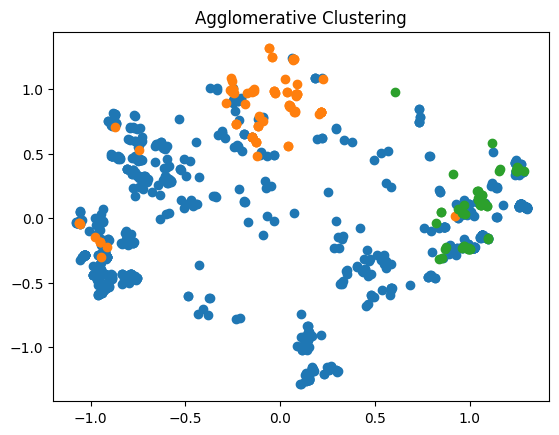

In [29]:
# Se emplea el modelo de agglomerative clustering con las n_clusters = 4 inicialmente
aglome = AgglomerativeClustering(n_clusters=4, linkage = "complete")

labels = aglome.fit_predict(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_1 = pca.fit_transform(X)
# Se gráfican los clusters iniciales
for visualize in range(3):
    visual_data = X_1[df1["punto_1"] == visualize]
    plt.scatter(visual_data[:,0],visual_data[:,1], label = f"Agglomerative Clustering {visualize}")
plt.title("Agglomerative Clustering")
plt.show()

***En esta parte inicial podemos observar que al utilizar n_clusters = 4 hay una poca coherencia en la distribución de los datos, dado que visualmente se observa que puede ser un número menor, por lo tanto se empieza a desarrollar las soluciones de los interrogantes planteados inicialmente por el tutor y poder definir el número ideal de clusters a partir del uso de Dendogramas y luego poder volver a ver gráficamente el comportamiento.***

**1. Encuentre el número óptimo de clusters utilizando el dendrogramas.**

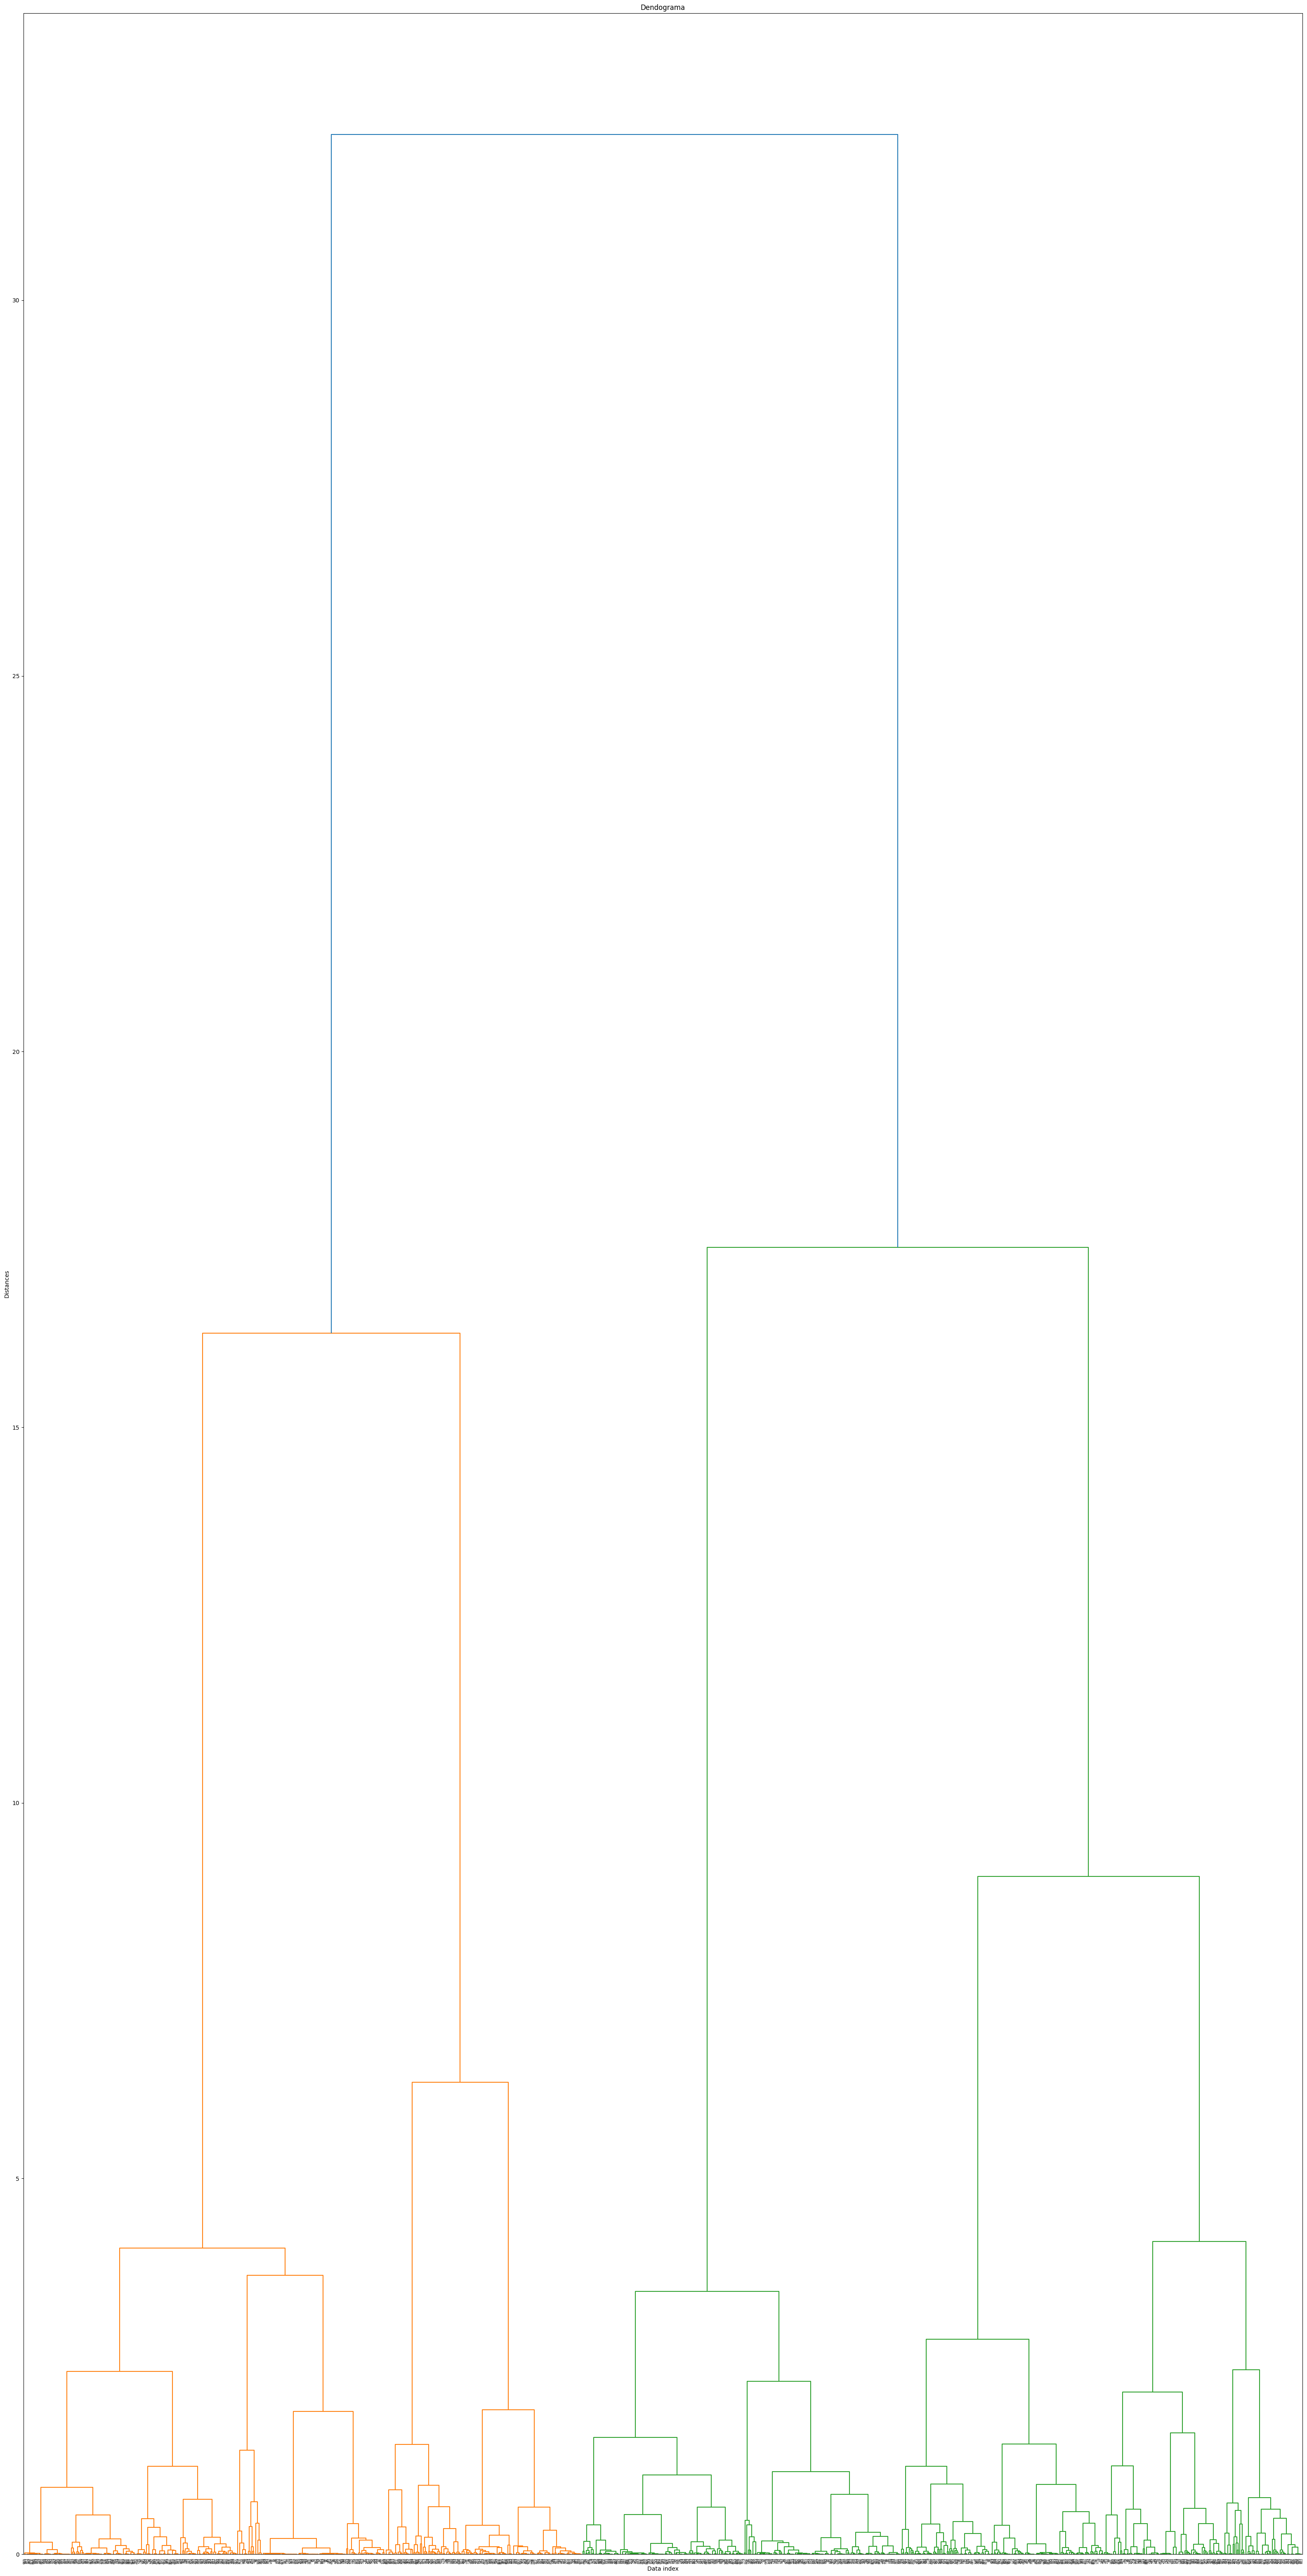

In [28]:
# Se desarrolla el dendograma
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
linkage_matrix = linkage(X_1, "ward")
plt.figure(figsize=(40,80))
dendrogram(linkage_matrix, p=3)
plt.title("Dendograma")
plt.xlabel("Data index")
plt.ylabel("Distances")
plt.show()

***Al verificar el dendograma y trazar una linea horizontal sobre el valor de distancia de 17 y 19 aproximadamente, se definío que el valor ideal de clusters son 3, ya que como se pudo ver en el dendograma en ese punto se encuentran 3 lineas verticales, para poder corroborrar esta información se va a gráficar nuevamente los clusters.***

In [20]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# **2. Entrene el modelo de agrupamiento jerárquico.**

In [24]:
# Se aplica el modelo de AgglomerativeClustering con el número de n_clusters obtenido del dendograma
aglome = AgglomerativeClustering(n_clusters=3, linkage = "complete")

labels = aglome.fit_predict(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_1 = pca.fit_transform(X)
df1["punto_1"] = aglome.fit_predict(X)

***Se vuelve a realizar el metodo de machine learning AgglomerativeClustering con el ajuste en la cantidad de n_clusters = 3 que se obtuvo del dendograma, con esto poder tener el modelo con el número de clusters ideal y poder posteriormente observar un gráfico bien definido con estos clusters***

# **3. Visualice los clusters**

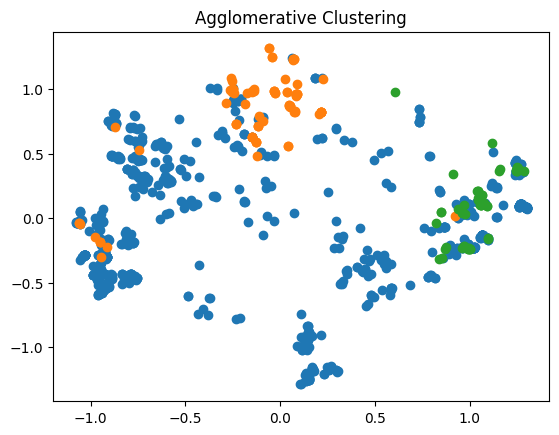

In [23]:
for visualize in range(3):
    visual_data = X_1[df1["punto_1"] == visualize]
    plt.scatter(visual_data[:,0],visual_data[:,1], label = f"Agglomerative Clustering {visualize}")
plt.title("Agglomerative Clustering")
plt.show()

***En este gráfico podemos observar claramente que n_clusters = 3 tiene una coherencia muy significativa, ya que se denota una agrupación completa de cada una de las dos zonas, teniendo así una posibilidad de analisis más completa y poder***

In [27]:
print(f"tamaños de cluster {np.bincount(labels)}")

tamaños de cluster [814  89  49]


***Se puede observar que al obtener los tamaños de cada clusters tiene sentido los valores obtenidos, dado que hay 1 cluster que tienen mayoria de datos frente a los otros 2 y en el gráfico se observa claramente***

# **CONCLUSIONES**

- Al momento de trabajar con el modelo de agglomerative clustering se pudo entender el comportamiento jerargico que tienen cada uno de los datos con el uso de dendogramas.
- Se pudo obtener el número ideal de clusters para poder definir gráficamente la mejor cantidad de agrupamientos que se tenían de los datos.

- Se entrenó el modelo con el número de clusters y se pudo obtener modelo ideal.

- Se gráficaron los clusters y se pudo observar que tenían un comportamiento ideal en el gráfico.

# **REFERENCIAS**

- Giuseppe Bonaccorso. (2018). Machine Learning Algorithms: Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing. (pp. 340-355). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1881497&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_340

- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 363-372). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_363